# Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, bigframes, bokeh, bqplot, cmdstanpy, cufflinks, datascience, db-dtypes, dopamine-rl, fastai, geemap, geopandas, google-colab, gspread-dataframe, holoviews, ibis-framework, mizani, mlxtend, pandas-datareader, pandas-gbq, panel, pins, plotnine, prophet, pymc, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
from scipy import stats

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATASET DO PROJETO

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)

Altura do morador em metros.

> ### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### Observação
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [8]:
caminho = '/content/drive/MyDrive/alura/course estatistica-distribuicoes-e-medidas/dados.csv'
dados = pd.read_csv(caminho)

### Visualize o conteúdo do DataFrame

In [9]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [10]:
dados.tail()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


In [11]:
dados.shape

(76840, 7)

In [12]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [13]:
dados.columns = dados.columns.str.replace(' ', '_')
dados.columns = dados.columns.str.lower()
dados.columns

Index(['uf', 'sexo', 'idade', 'cor', 'anos_de_estudo', 'renda', 'altura'], dtype='object')

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### Descreva os pontos mais relevantes que você observa na tabela e no gráfico.

Classes de renda:

<b>A</b> - Acima de 25 SM

<b>B</b> - De 15 a 25 SM

<b>C</b> - De 5 a 15 SM

<b>D</b> - De 2 a 5 SM

<b>E</b> - Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [14]:
salário_mínimo = 788.00

limites_superiores = [2, 5, 15, 25]
classes = []

classes.append(dados.renda.min())

for limite in limites_superiores:
  classes.append(salário_mínimo * limite)

classes.append(dados.renda.max())

classes

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]

### 2º Definir os labels das classes

In [15]:
labels = []

for letra in reversed(list('abcde')):
  labels.append(f'classe {letra}')

labels

['classe e', 'classe d', 'classe c', 'classe b', 'classe a']

### 3º Construir a coluna de frequências

In [16]:
frequência = pd.value_counts(pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True))
frequência

classe e    49755
classe d    18602
classe c     7241
classe b      822
classe a      420
Name: renda, dtype: int64

### 4º Construir a coluna de percentuais

In [17]:
percentual = pd.value_counts(pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True), normalize=True)
percentual

classe e    0.647514
classe d    0.242087
classe c    0.094235
classe b    0.010698
classe a    0.005466
Name: renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [18]:
distribuição = pd.DataFrame({'frequência':frequência, 'percentual':percentual}).sort_index(ascending=False)
distribuição

,frequência,percentual
classe a,420,0.005466
classe b,822,0.010698
classe c,7241,0.094235
classe d,18602,0.242087
classe e,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='frequência', ylabel='percentual'>

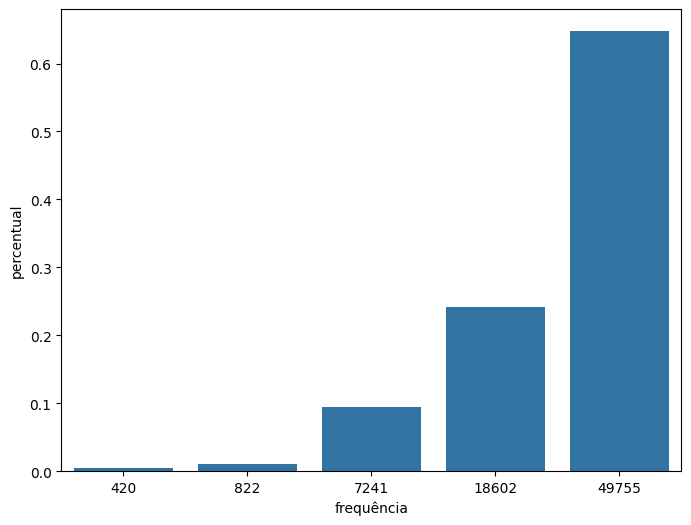

In [19]:
ax = sns.barplot(x=distribuição.frequência, y=distribuição.percentual)
ax.figure.set_size_inches(8, 6)
ax

> ### Conclusões

A análise dos dados revela uma significativa desigualdade na distribuição de renda, com a maioria dos indivíduos concentrados nas classes D e E, representando mais de 88% da amostra. Por outro lado, as classes de renda mais altas (A e B) têm uma representação extremamente pequena, com menos de 1% dos indivíduos recebendo acima de 15 salários mínimos. Essa disparidade sugere uma concentração significativa de recursos financeiros em uma pequena parcela da população, enquanto a maioria enfrenta dificuldades econômicas.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)

In [20]:
dados.columns

Index(['uf', 'sexo', 'idade', 'cor', 'anos_de_estudo', 'renda', 'altura'], dtype='object')

<ipython-input-21-0ee3b5b9678e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.idade)


<Axes: title={'center': 'distribuição de frequências - idade'}, xlabel='anos', ylabel='Density'>

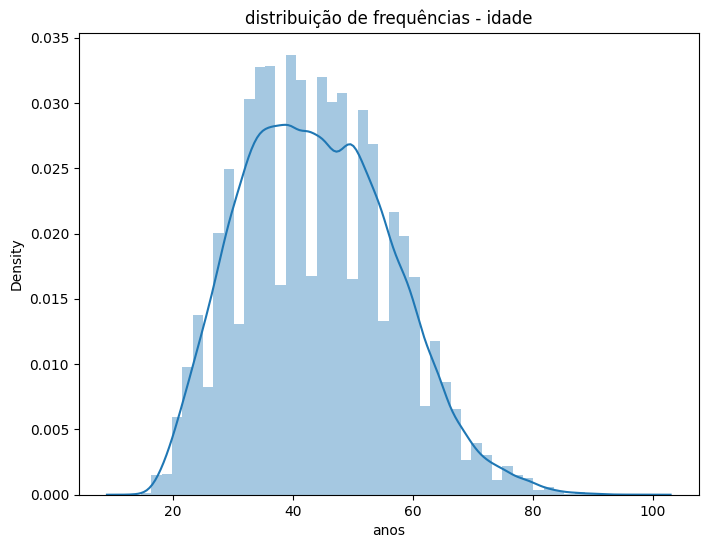

In [21]:
ax = sns.distplot(dados.idade)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - idade')
ax.set_xlabel('anos')
ax

<ipython-input-22-947ac5f1d631>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.anos_de_estudo)


<Axes: title={'center': 'distribuição de frequências - anos de estudo'}, xlabel='anos', ylabel='Density'>

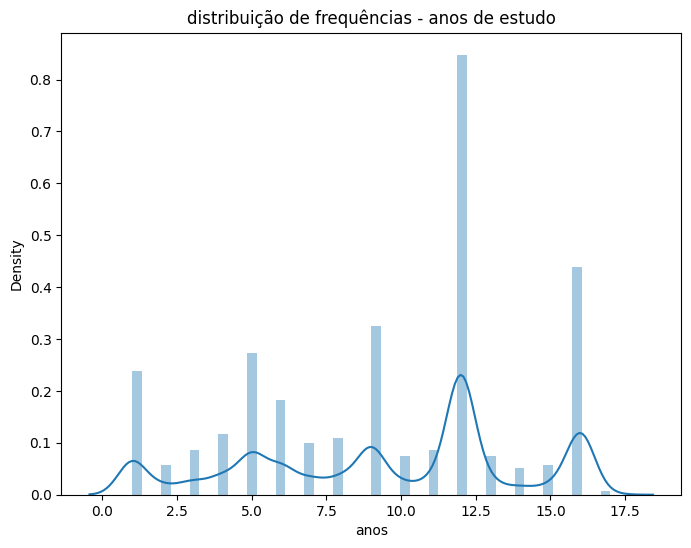

In [22]:
ax = sns.distplot(dados.anos_de_estudo)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - anos de estudo')
ax.set_xlabel('anos')
ax

<ipython-input-23-9a3bb19b39ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.renda)


<Axes: title={'center': 'distribuição de frequências - renda'}, xlabel='reais', ylabel='Density'>

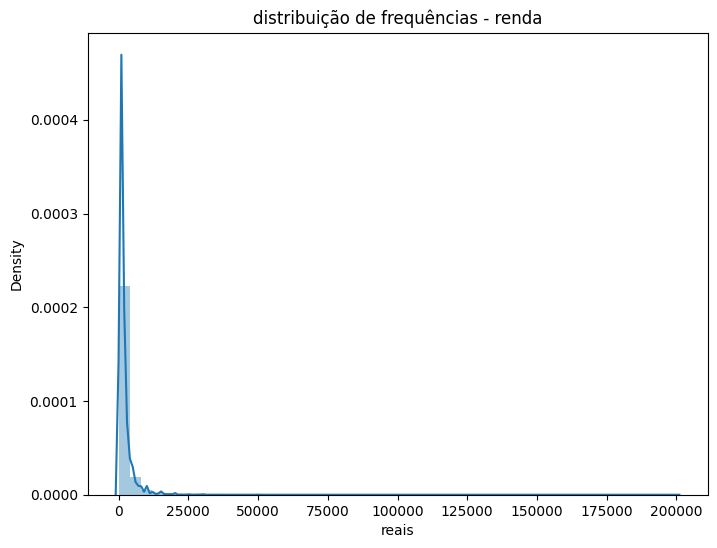

In [23]:
ax = sns.distplot(dados.renda)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - renda')
ax.set_xlabel('reais')
ax

<ipython-input-24-d018befd5c3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.altura)


<Axes: title={'center': 'distribuição de frequências - altura'}, xlabel='metros', ylabel='Density'>

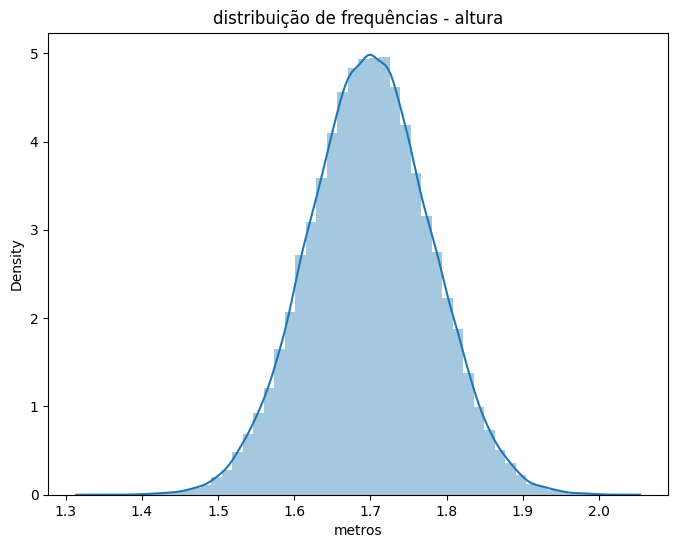

In [24]:
ax = sns.distplot(dados.altura)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - altura')
ax.set_xlabel('metros')
ax

> ### Conclusões

**Idade** - A predominância de pessoas entre 30 e 50 anos na pirâmide etária brasileira reflete um fenômeno demográfico significativo, com implicações abrangentes para diversos aspectos da sociedade. Esse perfil demográfico sugere um envelhecimento gradual da população, resultante de avanços na saúde, redução da taxa de natalidade e aumento da expectativa de vida. Como consequência, podem surgir desafios e oportunidades em áreas como previdência social, saúde pública, mercado de trabalho e políticas de desenvolvimento social.

**Anos de estudo** - A distribuição de frequência dos anos de estudo com um pico em 12 anos reflete um importante padrão educacional na população brasileira. Esse fenômeno sugere que um número significativo de indivíduos concluiu o ensino médio, pois 12 anos de estudo são geralmente necessários para isso. Pode indicar desafios persistentes de acesso à educação superior e a outras formas de formação profissional, que são cruciais para o avanço pessoal e o progresso coletivo.

**Renda** - A distribuição de renda, com a maioria da população ganhando menos de 25 mil reais e alguns indivíduos alcançando rendimentos de até 200 mil reais, evidencia a desigualdade econômica presente na sociedade brasileira. O entendimento desses padrões de renda é crucial para o desenvolvimento de políticas públicas voltadas para a redução da desigualdade e promoção de uma sociedade mais justa e inclusiva.

**Altura** - A distribuição de altura, com uma distribuição quase simétrica e uma média em torno de 1.70 a 1.75 metros, reflete um padrão observado em muitas populações ao redor do mundo. Essa simetria na distribuição sugere uma relativa uniformidade na altura das pessoas, com a maioria da população concentrada em torno da média, enquanto uma porção menor se encontra nos extremos mais altos e mais baixos da distribuição.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-25-c4cdcede5b26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.renda[dados.renda < 20000])


<Axes: title={'center': 'distribuição de frequências - renda até R$ 20.000,00'}, xlabel='reais', ylabel='Density'>

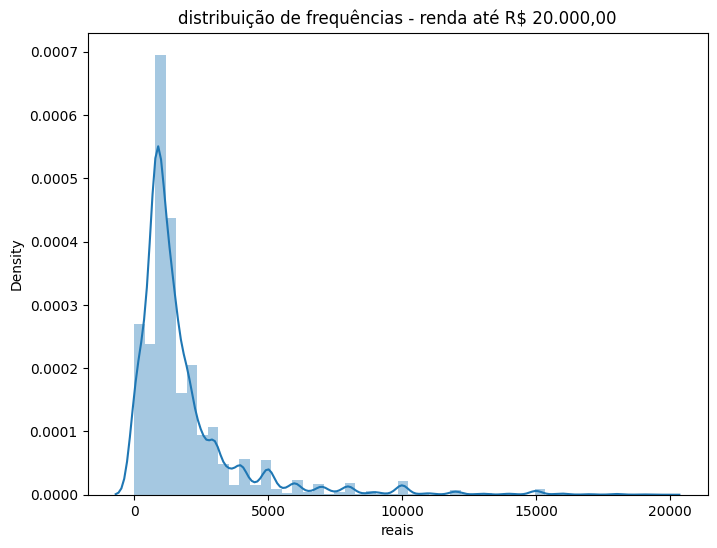

In [25]:
ax = sns.distplot(dados.renda[dados.renda < 20000])
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - renda até R$ 20.000,00')
ax.set_xlabel('reais')
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### Avalie o resultado da tabela e escreva suas principais conclusões
#### Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto

In [26]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

anos_de_estudo = {1: 'Sem instrução e menos de 1 ano',
                  2: '1 ano',
                  3: '2 anos',
                  4: '3 anos',
                  5: '4 anos',
                  6: '5 anos',
                  7: '6 anos',
                  8: '7 anos',
                  9: '8 anos',
                  10: '9 anos',
                  11: '10 anos',
                  12: '11 anos',
                  13: '12 anos',
                  14: '13 anos',
                  15: '14 anos',
                  16: '15 anos ou mais',
                  17: 'Não determinados'}

uf = {11: 'Rondônia',
      12: 'Acre',
      13: 'Amazonas',
      14: 'Roraima',
      15: 'Pará',
      16: 'Amapá',
      17: 'Tocantins',
      21: 'Maranhão',
      22: 'Piauí',
      23: 'Ceará',
      24: 'Rio Grande do Norte',
      25: 'Paraíba',
      26: 'Pernambuco',
      27: 'Alagoas',
      28: 'Sergipe',
      29: 'Bahia',
      31: 'Minas Gerais',
      32: 'Espírito Santo',
      33: 'Rio de Janeiro',
      35: 'São Paulo',
      41: 'Paraná',
      42: 'Santa Catarina',
      43: 'Rio Grande do Sul',
      50: 'Mato Grosso do Sul',
      51: 'Mato Grosso',
      52: 'Goiás',
      53: 'Distrito Federal'}

In [27]:
frequência = pd.crosstab(dados.sexo, dados.cor)
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [28]:
percentual = pd.crosstab(dados.sexo, dados.cor, normalize=True)
percentual.rename(index=sexo, columns=cor, inplace=True)
percentual

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


> ### Conclusões

A discrepância nos números apresentados, onde a população branca e parda registra os maiores números tanto para homens quanto para mulheres, enquanto as populações indígena, preta e amarela têm números substancialmente menores, destaca a desigualdade racial existente na sociedade brasileira. A análise desses dados ressalta a importância de políticas e programas voltados para a promoção da equidade racial, visando reduzir as disparidades existentes e garantir uma sociedade mais justa e inclusiva para todos os cidadãos.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [29]:
dados.renda.mean()

2000.3831988547631

### Obtenha a mediana

In [30]:
dados.renda.median()

1200.0

### Obtenha a moda

In [31]:
dados.renda.mode()

0    788
Name: renda, dtype: int64

### Obtenha o desvio médio absoluto

In [32]:
(dados.renda - dados.renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [33]:
dados.renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [34]:
dados.renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### Destaque os pontos mais importante que você observa nas tabulações
#### O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i>

In [35]:
frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='mean')
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [36]:
frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='median')
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [37]:
frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='max')
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões


Ao analisar as medidas de média, mediana e valor máximo da variável de renda em relação ao sexo e cor da população, podemos observar algumas tendências interessantes. Primeiramente, em todas as categorias de cor, os valores de renda são consistentemente mais altos para o sexo masculino em comparação com o sexo feminino. Isso sugere uma disparidade de gênero na distribuição de renda, onde os homens tendem a ter rendimentos mais elevados em média. Além disso, ao comparar as diferentes categorias de cor, observamos variações significativas nos valores de renda, com rendimentos mais altos geralmente associados às categorias de cor branca e amarela, enquanto rendimentos mais baixos são observados nas categorias de cor indígena e preta. Isso evidencia a persistência da desigualdade racial na distribuição de renda, com populações não brancas enfrentando barreiras econômicas adicionais.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### Destaque os pontos mais importante que você observa nas tabulações
#### O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i>

In [38]:
frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='mad')
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

<ipython-input-38-16f06cbbf543>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='mad')
<ipython-input-38-16f06cbbf543>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='mad')
<ipython-input-38-16f06cbbf543>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='mad')
<ipython-input-38-16f06cbbf543>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [39]:
frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='var')
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [40]:
frequência = pd.crosstab(dados.sexo, dados.cor, values=dados.renda, aggfunc='std')
frequência.rename(index=sexo, columns=cor, inplace=True)
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

O MAD (desvio absoluto da mediana) indica a dispersão dos dados em relação à mediana, e observamos variações consideráveis nos valores MAD entre diferentes grupos de sexo e cor. Por exemplo, os homens de cor amarela têm o maior MAD, sugerindo uma maior dispersão em seus rendimentos em relação à mediana, enquanto as mulheres indígenas têm o maior MAD entre os grupos femininos. Além disso, ao analisar a variância e o desvio padrão, observamos uma tendência semelhante, com valores mais altos indicando uma maior dispersão dos dados em relação à média.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.
#### 1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000
#### 2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.[link text](https://)
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'renda segundo sexo e cor'}, xlabel='reais', ylabel='cor'>

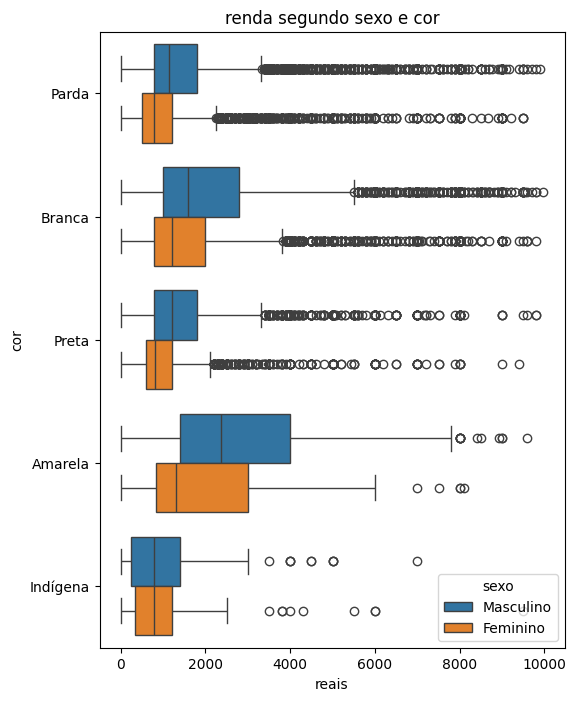

In [41]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.cor.map(cor), hue=dados.sexo.map(sexo), data=dados, orient='h')
ax.figure.set_size_inches(6, 8)
ax.set_title('renda segundo sexo e cor')
ax.set_xlabel('reais')
ax

> ### Conclusões

A análise do boxplot da variável de renda, considerando sexo e cor, revela uma tendência consistente de rendimentos menores na perspectiva feminina em comparação com a masculina, independentemente da categoria de cor. Isso é evidenciado pela posição das caixas (boxplots) correspondentes ao sexo feminino, que geralmente estão localizadas em níveis inferiores em relação ao sexo masculino nas categorias de cor. Essa disparidade sugere uma desigualdade de gênero na distribuição de renda, onde as mulheres tendem a enfrentar barreiras econômicas adicionais que impactam negativamente seus rendimentos em comparação com os homens, mesmo quando consideramos fatores como etnia ou cor da pele.

# DESAFIO
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [42]:
stats.percentileofscore(dados.renda, salário_mínimo, kind='weak')

28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.

In [43]:
dados.renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### Destaque os pontos mais importante que você observa nas tabulações
#### O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i>

In [44]:
frequência = pd.crosstab(dados.anos_de_estudo, dados.sexo, values=dados.renda, aggfunc='mean')
frequência.rename(columns=sexo, inplace=True)
frequência

sexo,Masculino,Feminino
anos_de_estudo,,
1,799.494638,516.201748
2,895.629047,492.771987
3,931.178986,529.911638
4,1109.203862,546.853916
5,1302.329283,704.279111
6,1338.653218,781.389776
7,1448.875419,833.732824
8,1465.497940,830.751004
9,1639.396667,933.615351


In [45]:
frequência = pd.crosstab(dados.anos_de_estudo, dados.sexo, values=dados.renda, aggfunc='median')
frequência.rename(columns=sexo, inplace=True)
frequência

sexo,Masculino,Feminino
anos_de_estudo,,
1,700,390
2,788,400
3,788,450
4,800,500
5,1000,788
6,1045,788
7,1200,788
8,1200,788
9,1300,800


In [46]:
frequência = pd.crosstab(dados.anos_de_estudo, dados.sexo, values=dados.renda, aggfunc='max')
frequência.rename(columns=sexo, inplace=True)
frequência

sexo,Masculino,Feminino
anos_de_estudo,,
1,30000,10000
2,30000,2000
3,40000,4000
4,80000,3500
5,50000,10000
6,35000,8000
7,25000,6000
8,40000,9000
9,30000,18000


In [47]:
frequência = pd.crosstab(dados.anos_de_estudo, dados.sexo, values=dados.renda, aggfunc='std')
frequência.rename(index=anos_de_estudo, columns=sexo, inplace=True)
frequência

sexo,Masculino,Feminino
anos_de_estudo,,
Sem instrução e menos de 1 ano,1023.904884,639.311534
1 ano,1331.950552,425.291842
2 anos,1435.173827,498.234168
3 anos,2143.800133,424.124446
4 anos,1419.821787,629.553397
5 anos,1484.650587,635.782641
6 anos,1476.628602,574.547028
7 anos,1419.708673,602.038029
8 anos,1515.583715,896.781213


> ### Conclusões

- Em geral, a média de renda para os homens é mais alta do que para as mulheres em todos os níveis de anos de estudo. Essa disparidade é consistente em todas as categorias de anos de estudo.
- Conforme o número de anos de estudo aumenta, a média de renda tende a crescer para ambos os sexos. Isso sugere que a educação pode desempenhar um papel significativo no aumento dos rendimentos.
- Mesmo quando se considera o mesmo nível de anos de estudo, os homens tendem a ter uma média de renda mais alta do que as mulheres. Isso destaca a persistência da desigualdade de gênero no mercado de trabalho.
- As estatísticas de renda, como média, mediana, máximo e desvio padrão, variam consideravelmente entre os diferentes níveis de anos de estudo e entre os sexos. Por exemplo, a renda máxima aumenta significativamente com o aumento dos anos de estudo, enquanto o desvio padrão indica a dispersão dos valores de renda em torno da média.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.
#### 1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000
#### 2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i>
#### 3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'renda segundo anos de estudo e sexo abaixo de R$ 10.000'}, xlabel='reais', ylabel='anos_de_estudo'>

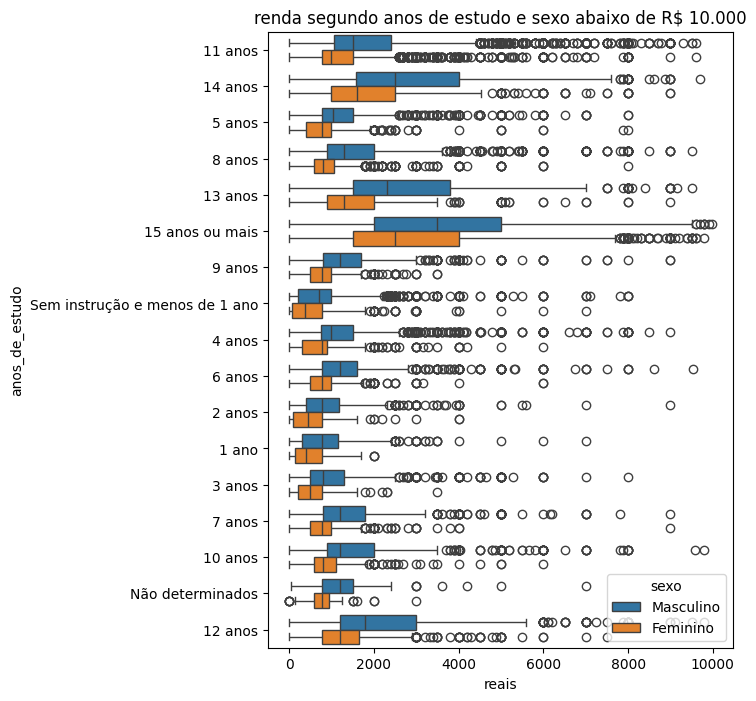

In [48]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.anos_de_estudo.map(anos_de_estudo), hue=dados.sexo.map(sexo), data=dados, orient='h')
ax.figure.set_size_inches(6, 8)
ax.set_title('renda segundo anos de estudo e sexo abaixo de R$ 10.000')
ax.set_xlabel('reais')
ax

<Axes: title={'center': 'renda segundo anos de estudo e sexo abaixo de R$ 10.000 - 30 anos'}, xlabel='reais', ylabel='anos_de_estudo'>

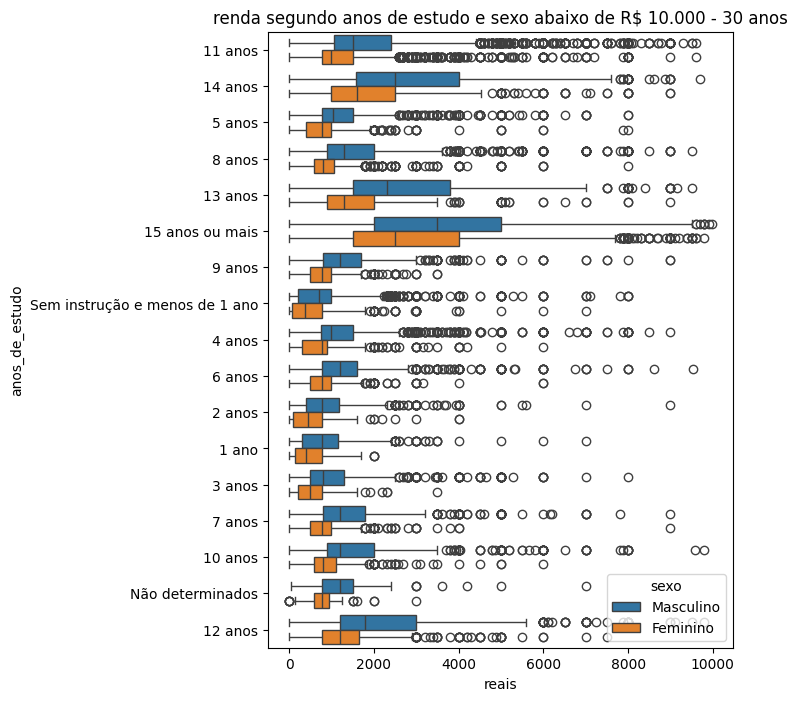

In [49]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.anos_de_estudo.map(anos_de_estudo), hue=dados.sexo.map(sexo), data=dados[dados.idade == 30], orient='h')
ax.figure.set_size_inches(6, 8)
ax.set_title('renda segundo anos de estudo e sexo abaixo de R$ 10.000 - 30 anos')
ax.set_xlabel('reais')
ax

<Axes: title={'center': 'renda segundo anos de estudo e sexo abaixo de R$ 10.000 - 40 anos'}, xlabel='reais', ylabel='anos_de_estudo'>

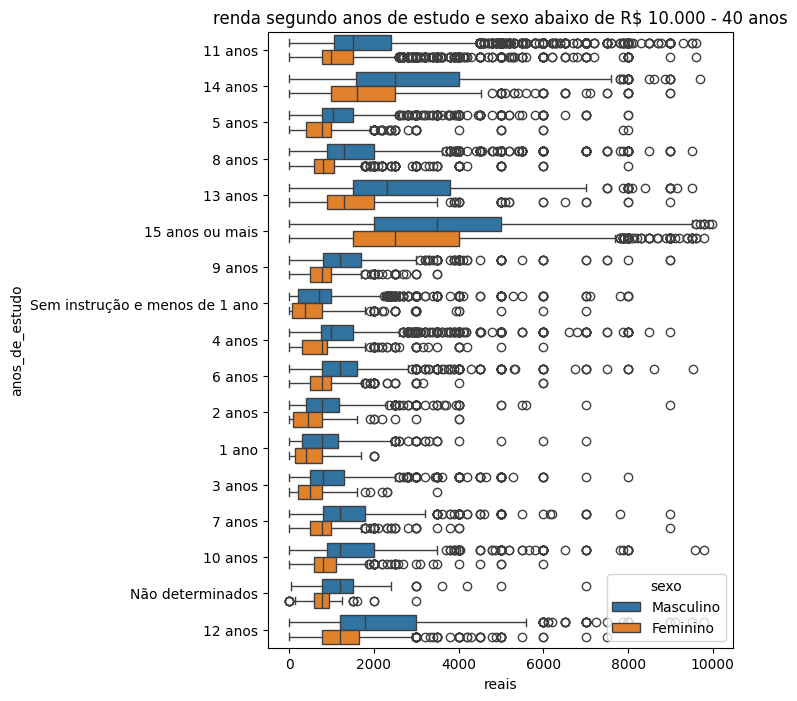

In [50]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.anos_de_estudo.map(anos_de_estudo), hue=dados.sexo.map(sexo), data=dados[dados.idade == 40], orient='h')
ax.figure.set_size_inches(6, 8)
ax.set_title('renda segundo anos de estudo e sexo abaixo de R$ 10.000 - 40 anos')
ax.set_xlabel('reais')
ax

<Axes: title={'center': 'renda segundo anos de estudo e sexo abaixo de R$ 10.000 - 50 anos'}, xlabel='reais', ylabel='anos_de_estudo'>

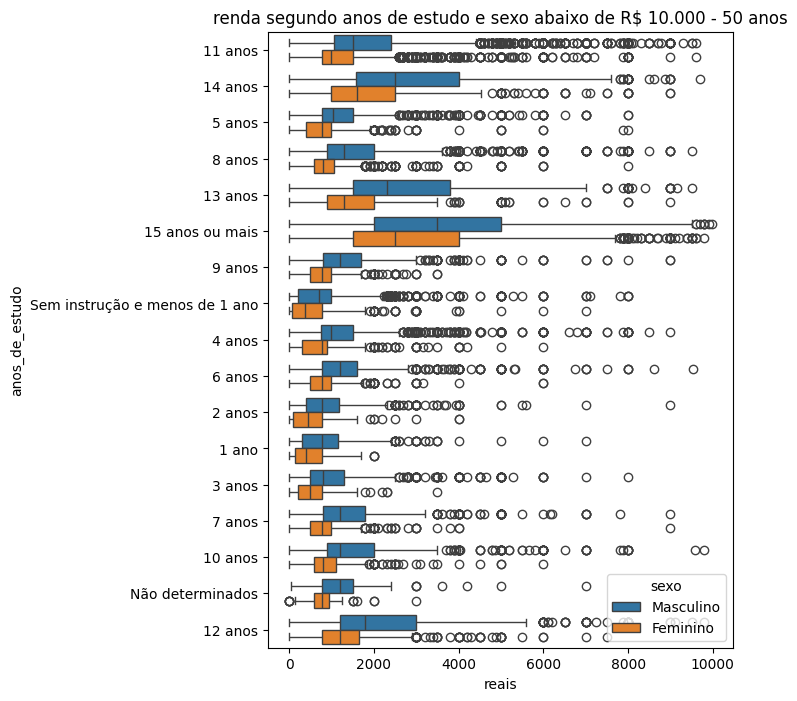

In [51]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.anos_de_estudo.map(anos_de_estudo), hue=dados.sexo.map(sexo), data=dados[dados.idade == 50], orient='h')
ax.figure.set_size_inches(6, 8)
ax.set_title('renda segundo anos de estudo e sexo abaixo de R$ 10.000 - 50 anos')
ax.set_xlabel('reais')
ax

> ### Conclusões

- A análise do boxplot revela que, em geral, há uma tendência de aumento na renda conforme o número de anos de estudo aumenta, para ambos os sexos. No entanto, mesmo entre pessoas com o mesmo nível de anos de estudo, os homens tendem a ter uma renda média mais alta do que as mulheres, evidenciando a persistência da desigualdade de gênero no mercado de trabalho.
- Mesmo nos grupos com anos de estudo não determinados ou não aplicáveis, onde os valores de renda são consistentemente baixos, os homens continuam a ganhar mais do que as mulheres. Isso sugere que a desigualdade salarial persiste independentemente do nível educacional ou da idade das pessoas analisadas.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### Destaque os pontos mais importante que você observa nas tabulações
#### Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i>

In [52]:
dados.groupby(dados.uf).agg({'renda':['mean', 'median', 'max', 'std']}).rename(index=uf)

renda                             
                            mean  median     max          std
uf                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

> ### Conclusões

- A renda média e mediana variam significativamente entre os estados, com valores mais elevados geralmente observados nos estados mais desenvolvidos economicamente, como Distrito Federal, São Paulo e Rio de Janeiro, e valores mais baixos em estados menos desenvolvidos, como Maranhão e Piauí.
- O desvio padrão mostra a dispersão dos dados em torno da média. Estados com desvio padrão mais elevado tendem a ter uma variação maior na renda, indicando uma maior disparidade de renda entre os residentes.
- Alguns estados apresentam valores máximos de renda muito altos, como Rio de Janeiro e São Paulo, indicando a presença de outliers ou indivíduos com renda muito alta.

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.
#### 1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000

<Axes: title={'center': 'renda segundo as unidades da federação'}, xlabel='reais', ylabel='uf'>

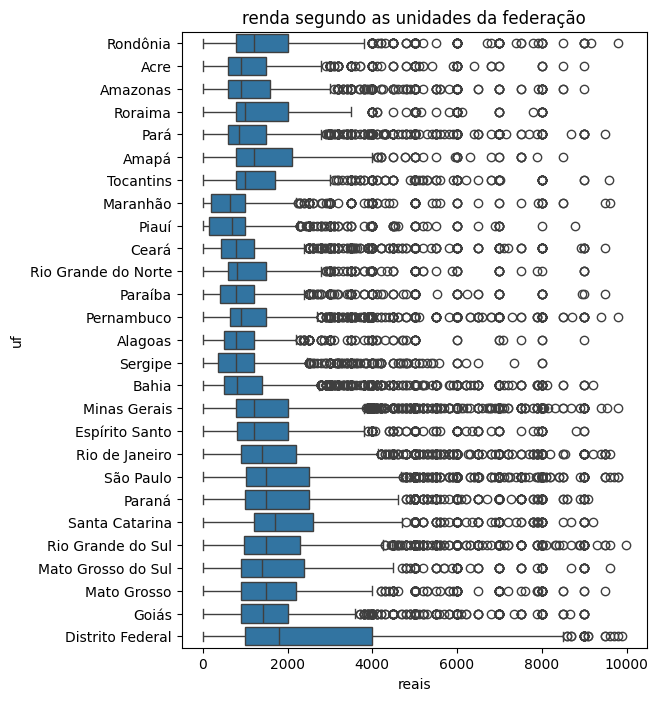

In [53]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.uf.map(uf), data=dados, orient='h')
ax.figure.set_size_inches(6, 8)
ax.set_title('renda segundo as unidades da federação')
ax.set_xlabel('reais')
ax

> ### Conclusões

Os estados das regiões Sul e Sudeste apresentam consistentemente renda acima dos estados de outras regiões do Brasil. Isso sugere uma disparidade significativa nos rendimentos entre diferentes partes do país, com os estados dessas regiões geralmente apresentando maiores níveis de desenvolvimento econômico e, consequentemente, renda mais alta.

Essa disparidade pode ser influenciada por diversos fatores, como a concentração de indústrias, serviços e oportunidades de emprego, bem como políticas públicas voltadas para o desenvolvimento econômico e social.